In [ ]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

import joblib

In [154]:
true_path = "../datasets/true.csv"
fake_path = "../datasets/fake.csv"

df_true = pd.read_csv(true_path)
df_fake = pd.read_csv(fake_path)

print(df_true.shape)
df_true.head()

(21417, 4)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [155]:
print(df_fake.shape)
df_fake.head()

(23481, 4)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [156]:
df_fake['Authenticity'] = "fake"
df_true['Authenticity'] = "Real"

df = pd.concat([df_true,df_fake], axis=0)

print(df.shape)
df.head()


(44898, 5)


,title,text,subject,date,Authenticity
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",Real
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",Real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Real
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",Real
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Real


In [157]:
df.loc[0, 'text']

0    WASHINGTON (Reuters) - The head of a conservat...
0    Donald Trump just couldn t wish all Americans ...
Name: text, dtype: object

In [158]:
df.describe()

,title,text,subject,date,Authenticity
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",fake
freq,14,627,11272,182,23481


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44898 non-null  object
 1   text          44898 non-null  object
 2   subject       44898 non-null  object
 3   date          44898 non-null  object
 4   Authenticity  44898 non-null  object
dtypes: object(5)
memory usage: 3.1+ MB


In [160]:
df.isna().sum()

title           0
text            0
subject         0
date            0
Authenticity    0
dtype: int64

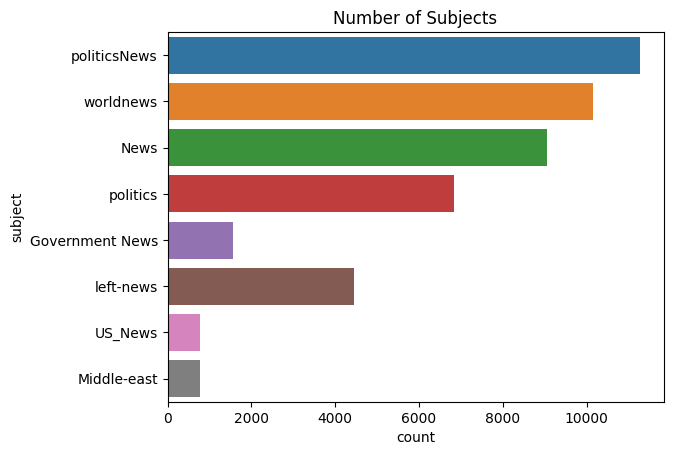

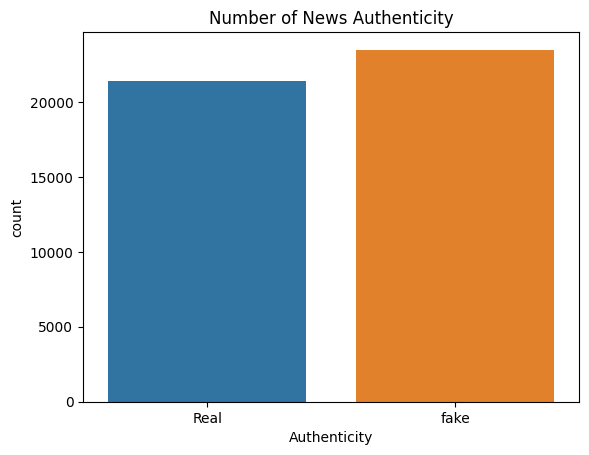

In [161]:
sns.countplot(y='subject', data=df, hue='subject')
plt.title('Number of Subjects')
plt.show()

sns.countplot(x='Authenticity', data=df, hue='Authenticity')
plt.title('Number of News Authenticity')
plt.show()

In [162]:
X = df['text']
y = df['Authenticity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25) 

In [163]:
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

logreg = LogisticRegression(max_iter=500, random_state=20)
logreg.fit(X_train_vec, y_train)
y_pred = logreg.predict(X_test_vec)

result = pd.DataFrame({'True Value': y_test,
                       'Prediction':y_pred
                       })
print(accuracy_score(y_true=y_test, y_pred=y_pred))
result.head(n=100)

0.9864587973273942


,True Value,Prediction
799,fake,fake
6500,fake,fake
3590,fake,fake
1377,Real,Real
11059,fake,fake
...,...,...
2123,fake,fake
6196,Real,Real
20168,Real,Real
2615,fake,fake


In [164]:
my_news_vec = vectorizer.transform(["""Thailand has accused Cambodia of "deliberately" violating a ceasefire the two countries agreed on Monday to end border clashes that have killed at least 33 people and displaced thousands.

It's a shaky start for the ceasefire, which is aimed at bringing an end to five days of bombardment and rocket attacks along their shared border.

The Thai military says it stopped firing after midnight, but that it continued to receive gunfire from the Cambodian side "at multiple locations" up until this morning.

But Cambodia's defence ministry told the AFP news agency that there had been "no armed clashes" between the two sides since the ceasefire began at midnight.

Despite the accusations, meetings between local commanders from both sides took place earlier on Tuesday as part of the ceasefire agreement. They agreed to stop shooting and halt the movement of troops on the frontline. They will also allow each other to collect their dead.

Tensions between the South East Asian countries over their century-old disputed border ramped up in May when a Cambodian soldier was killed in a clash.

They escalated into a full-scale conflict last week after five Thai soldiers were injured in a landmine explosion. Thailand closed some of its border crossings, expelled the Cambodian ambassador and recalled its own from Phnom Penh.

After the two sides exchanged gunfire early last Thursday, Cambodia fired multiple rockets into Thailand, killing several civilians.

More civilians died on both sides in the following days, and tens of thousands more were evacuated to shelters.

Intense exchanges of fire between the two armies continued up to midnight on Monday, the deadline for the ceasefire, with Thailand launching more air strikes on Cambodian positions.

But on Tuesday morning, before Thailand alleged the ceasefire had been violated, Cambodia's Prime Minister Hun Manet said that the "frontlines have eased" since midnight.

Under the ceasefire agreement, both sides are meant to pull back their armies and accept some kind of independent monitoring to prevent further clashes.

Hun Manet and his Thai counterpart Phumtham Wechayachai had met on Monday in Malaysia in a meeting brokered by its leader Anwar Ibrahim.

An outgunned Cambodia had been pushing for a ceasefire and its leader called it a "very good meeting".
  
Thailand, which had initially been  reluct ant to negotiate, agreed to the talks after US President Donald Trump threatened to halt negotiations over tariffs until Thailand and Cambodia stopped fighting. """])

my_pred = logreg.predict(my_news_vec)
print(my_pred)

['Real']


In [165]:
fake_news = """Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."""
my_news_vec = vectorizer.transform([fake_news])

my_pred = logreg.predict(my_news_vec)
print(my_pred)

['fake']


In [ ]:
#HYPERPARAMETER TUNING MODEL

model = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('logreg', LogisticRegression())
])

params = {
    'logreg__max_iter':[100, 300, 500],
    'logreg__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
kf = KFold(n_splits=7, random_state=0, shuffle=True)
model_cv = GridSearchCV(model,param_grid=params, scoring='accuracy', cv=kf)

model_cv.fit(X_train, y_train)

print("Best parameter:",model_cv.best_params_)
print("Best Score:",model_cv.best_score_)

f:\Github Projects\Fake-News-Detector\venv\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
21 fits failed out of a total of 126.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "f:\Github Projects\Fake-News-Detector\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "f:\Github Projects\Fake-News-Detector\venv\lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "f:\Github Projects\Fake-News-Detector\venv\lib\site-packages\sklearn\pipeline.py", line 663, in fit
    sel

Best parameter: {'logreg__max_iter': 100, 'logreg__solver': 'lbfgs'}
Best Score: 0.9845572809613551


In [169]:
#TUNED MODEL

model = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english')),
    ('logreg', LogisticRegression(max_iter=100, solver='lbfgs'))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

        Real       0.98      0.99      0.99      5396
        fake       0.99      0.98      0.99      5829

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225

[[5340   56]
 [  96 5733]]
